# Import modules

In [1]:
import xarray as xr
import numpy as np
import cftime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from textwrap import wrap

# Functions

# Definitions

In [2]:
in_file = '../../run/carma/carma_fractalopticstest.nc' 
plot_dir = "./figures/"

# List of names of the experiments
expers = ['standard', 'fractal'] 

# Dictionary

In [4]:
ds = xr.open_dataset(in_file, decode_times=False)   

# Plots

In [3]:
# Optics variables
coord_vars = ['bin', 'wave',  'refidx_r', 'refidx_i']
dim_vars   = ['r', 'rmass', 'vol', 'dr', 'dm', 'rrat', 'rprat', 'arat', 'nmon', 'df']
opt_vars   = [ 'qext', 'ssa', 'asy']

In [5]:
color_exp = { exp: sns.color_palette()[e] for e, exp in enumerate(expers) } 
color_mers= {}
color_mers[expers[0]]= sns.color_palette("Blues_r", 10)
color_mers[expers[1]] = sns.color_palette("Oranges_r", 10)



# SW and LW range for plot
l_sw_min = 0.3e-4 # cm
l_sw_max = 3.0e-4 # cm
l_lw_min = 3.0e-4 # cm
l_lw_max = 100.0e-4 # cm

## Input data

In [6]:
headers_var = ['wave',  'refidx_r', 'refidx_i']
headers = [ds[var].long_name + ' (' + ds[var].units + ')' for var in headers_var]

data = np.zeros((len(ds['wave']), len(headers_var)))
for v, var in enumerate(headers_var):
    data[:, v] = ds[var]    
        
styles = [dict(selector="th", props=[('max-width', '300px'), ('text-align', 'left')]), 
          dict(selector="td", props=[('text-align', 'center')]),
          dict(selector="caption", props=[('font-weight', 'bold'), ('font-size', '16px')])]
 

pd.set_option('display.float_format', '{:.2E}'.format)
table = pd.DataFrame(data, columns=headers)
print(table)

    wavelength (cm)  Refractive index - real ()  \
0          2.31E-05                    1.88E+00   
1          3.04E-05                    1.82E+00   
2          3.93E-05                    1.79E+00   
3          5.33E-05                    1.77E+00   
4          7.02E-05                    1.77E+00   
5          1.01E-04                    1.76E+00   
6          1.27E-04                    1.75E+00   
7          1.46E-04                    1.75E+00   
8          1.78E-04                    1.74E+00   
9          2.05E-04                    1.73E+00   
10         2.33E-04                    1.72E+00   
11         2.79E-04                    1.71E+00   
12         3.46E-04                    1.69E+00   
13         3.59E-04                    1.68E+00   
14         4.02E-04                    1.66E+00   
15         4.32E-04                    1.65E+00   
16         4.63E-04                    1.64E+00   
17         5.18E-04                    1.61E+00   
18         6.16E-04            

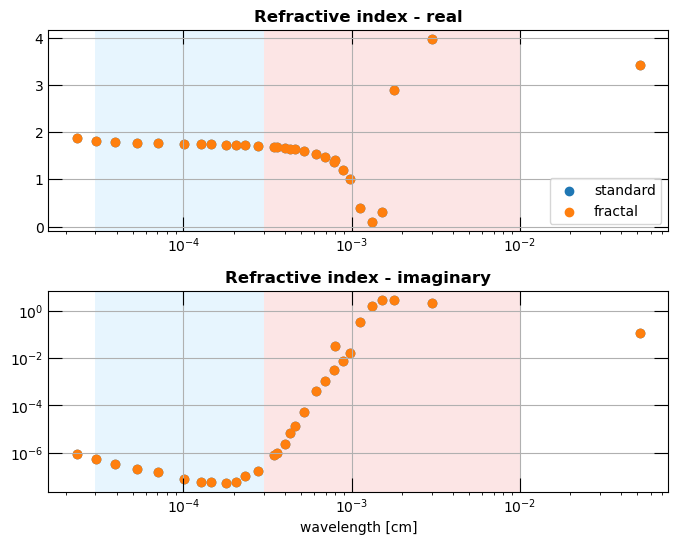

In [7]:
fig, axs = plt.subplots(figsize=(8,6), nrows=2, ncols=1) 
axs = axs.flatten()

fig.subplots_adjust(hspace=0.3, wspace=0.2)


for i, var in enumerate(['refidx_r', 'refidx_i']):
    axs[i].axvspan(l_sw_min, l_sw_max, facecolor='lightskyblue', alpha=0.2)
    axs[i].axvspan(l_lw_min, l_lw_max , facecolor='lightcoral', alpha=0.2)
    for exp in expers:
        axs[i].scatter(ds.wave, ds[var], color=color_exp[exp], marker='o', label=exp)

    ## Axis aspect 
    axs[i].set_title(ds[var].long_name, fontweight='bold') 
    axs[i].grid()
    axs[i].tick_params( direction="in", length=10, top=True, right=True)
    axs[i].set_ylabel(ds[var].units)
    axs[i].set_xscale('log')
    
axs[0].legend()
axs[1].set_yscale('log')
axs[1].set_xlabel(ds.wave.long_name + ' [' + ds.wave.units + ']')


fig.patch.set_facecolor('white')
# fig.savefig(plot_dir +'wave.png', bbox_inches='tight')

## Output

Bin variables

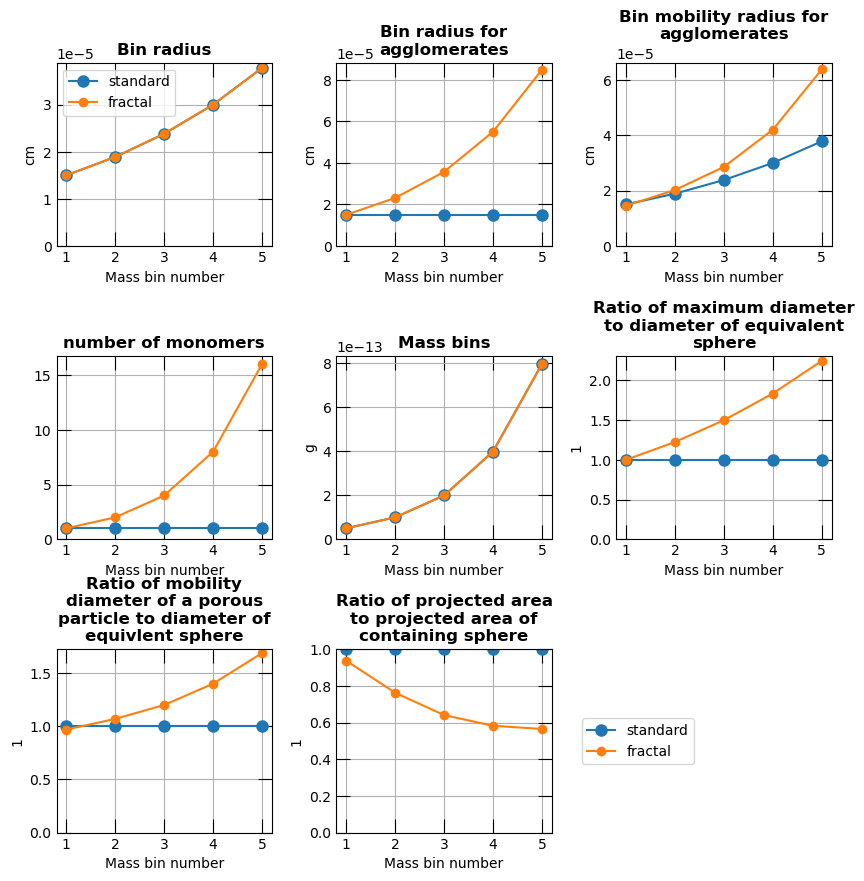

In [8]:
fig, axs = plt.subplots(figsize=(10, 10), nrows=3, ncols=3)  
axs = axs.flatten()
fig.subplots_adjust(hspace=0.6, wspace=0.3)


for i, var in enumerate([ 'r', 'rg', 'rp','nmon', 'rmass',  'rrat', 'rprat', 'arat']):
    for e, exp in enumerate(expers):
        vr = exp + '_' + var
        axs[i].plot(ds[vr].bin, ds[vr], marker='o', markersize=8-2*e, label=exp)
    
    ## Axis aspect 
    axs[i].set_title( "\n".join(wrap(ds[vr].long_name, 25)), fontweight='bold')
    axs[i].set_ylabel(ds[vr].units)   
    axs[i].set_xlabel('Mass bin number')
    axs[i].grid()
    axs[i].tick_params( direction="in", length=10, top=True, right=True)
    axs[i].set_ylim(bottom=0)
    axs[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='y')

axs[8].axis('off')
axs[0].legend( fancybox=True)


axs[i].set_ylim([0, 1.])
axs[i].legend(loc='center', bbox_to_anchor=(1.4, .5))

fig.patch.set_facecolor('white')
# fig.savefig(plot_dir +'agglomerate.png', bbox_inches='tight')

Optical properties

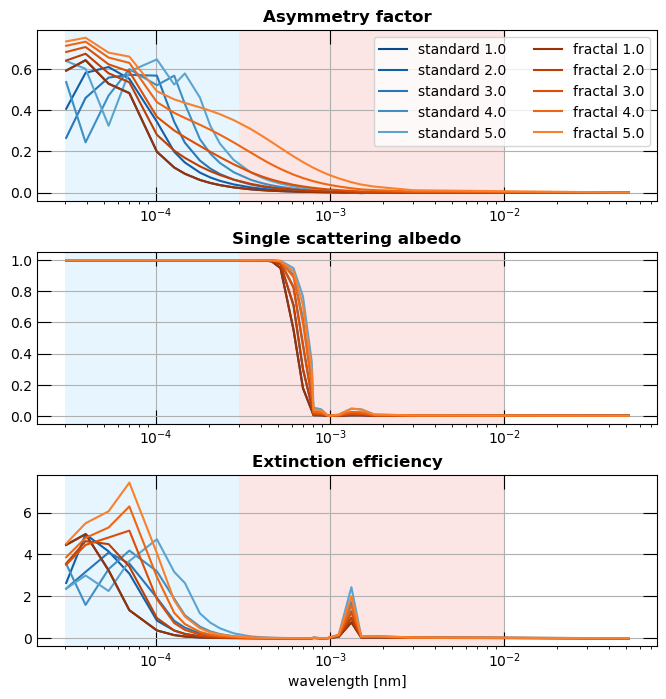

In [11]:
fig, axs = plt.subplots(figsize=(8,8), nrows=3) 
axs = axs.flatten()

fig.subplots_adjust(hspace=0.3, wspace=0.2)


for v, var in enumerate(['asy', 'ssa', 'qext']):
    i = v #2*v + e        
    axs[i].axvspan(l_sw_min, l_sw_max, facecolor='lightskyblue', alpha=0.2)
    axs[i].axvspan(l_lw_min, l_lw_max , facecolor='lightcoral', alpha=0.2)   
    for e, exp in enumerate(expers):
  
        vr = exp + '_' + var
        for b,bn in enumerate(ds.bin):
            # bn = ds.bin[2]
            axs[i].plot(ds[vr].wave[1:], ds[vr].sel(bin=bn)[1:], 
                        color=color_mers[exp][b], label=exp + ' ' + str(bn.values) )

    ## Axis aspect 
    axs[i].set_title(ds[vr].long_name, fontweight='bold') 
    axs[i].grid()
    axs[i].tick_params( direction="in", length=10, top=True, right=True)
    axs[i].set_ylabel(ds[vr].units)
    axs[i].set_xscale('log')
    
axs[0].legend(ncols=len(expers))
axs[-1].set_xlabel(ds.wave.long_name + ' [nm]')


fig.patch.set_facecolor('white')
# fig.savefig(plot_dir +'optics.png', bbox_inches='tight')